# Card Classification

Each image we are assessing is exactly one card. For each image we want to determine the following properties:
1) **Colour**: Red, purple or green
2) **Count**: 1, 2 or 3
3) **Shape**: Oval, diamond or squiggle
4) **Fill**: Solid, hollow or shaded

- We'll start with count so that we can then just zoom in on one shape on the card afterwards.
- Next, we will do Fill. Fill should be done before colour since the fill will determine the 
  "average" colour of the shape.
- Colour can then be done. 
- Finally, Shape.

In [239]:
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt

def display_image(image, title=None, cmap=None, max_size=(800, 800)):
    """
    Display an image using matplotlib after resizing it to a smaller size.

    Parameters:
    - image: The image to display.
    - title: The title of the image (optional).
    - cmap: The colormap to use for displaying the image (optional).
    - max_size: The maximum size (width, height) to resize the image to (default is (400, 400)).
    """
    # Resize the image to fit within the max_size while maintaining the aspect ratio
    h, w = image.shape[:2]
    scaling_factor = min(max_size[0] / w, max_size[1] / h)
    new_size = (int(w * scaling_factor), int(h * scaling_factor))
    resized_image = cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)

    # Convert color from BGR (OpenCV) to RGB (Matplotlib)
    if len(resized_image.shape) == 3 and resized_image.shape[2] == 3:
        resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.figure(figsize=(4, 4))  # Adjust the figsize to make the display smaller
    if title:
        plt.title(title)
    plt.imshow(resized_image, cmap=cmap)
    plt.axis('off')
    plt.show()

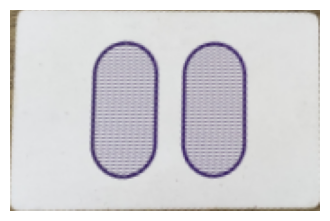

In [250]:
# Load the image using OpenCV
card = cv2.imread('./static/extracted_cards/card_4.png')
card = imutils.resize(card, width=500)

# Display the image
display_image(image=card)

## Count

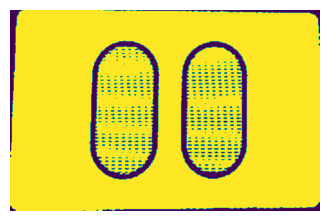

In [251]:
# Do some filtering to really make the shapes stand out.

# Apply grey scale filter
gray = cv2.cvtColor(card, cv2.COLOR_BGR2GRAY)

# Gaussian blur the image.
blur = cv2.GaussianBlur(gray, (3, 3), 0)

# Otsu's threshold
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

display_image(thresh)

The card's Count is: 2


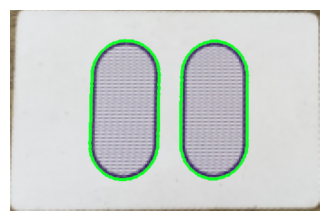

In [255]:
# Find contours and filter for cards using contour area.
# RETR_TREE: tries to find all contours.
cnts, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_image = card.copy()

# We don't want to capture the smaller shapes, only the cards. So set a 
# threshold here. 
threshold_min_area = 400
finalContours = []
for i, contour in enumerate(cnts):
    parent_index = hierarchy[0][i][3]
    hasParent = parent_index != -1

    area = cv2.contourArea(contour)

    # Area of this contour itself is too small/large.
    if area < threshold_min_area or area > 30000: 
        continue

    # Usually we dont want to include contours that have a parent
    # unless that parent is the card itself.
    if hasParent and cv2.contourArea(cnts[parent_index]) < 30000:
        continue

    cv2.drawContours(contours_image, [contour], 0, (36,255,12), 3)

    finalContours.append(contour)

count = len(finalContours)
if count == 0:
    raise Exception("No shapes were found on the card!")

print("The card's Count is:", count)

display_image(contours_image)


## Zoom in on just one shape on the card

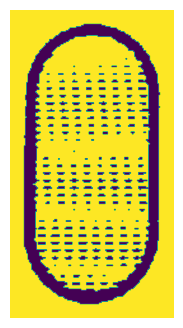

In [258]:
# Now we can just focus on one shape. So select one contour
# and zoom in on that. 
contour = finalContours[0]

x, y, w, h = cv2.boundingRect(contour)

thresh_single_shape = thresh[y-10:y+h+10, x-10:x+w+10]
card_single_shape = card[y-10:y+h+10, x-10:x+w+10]

display_image(thresh_single_shape)

num contours:  198
30976.0
21024.5
15634.5
16.0
19.0
19.0
4.0
10.0
14.5
10.0
10.0
6.0
6.0
4.0
2.0
13.0
19.0
20.5
17.0
21.0
18.0
14.0
19.0
19.0
19.0
19.0
19.5
23.0
17.0
17.5
20.5
19.0
20.5
20.5
19.0
19.0
19.0
16.0
16.0
17.5
16.0
19.0
19.0
20.5
19.0
6.0
13.0
16.0
13.0
13.0
17.5
14.5
16.0
4.0
2.0
6.0
2.0
6.0
8.0
8.0
8.5
10.0
2.0
2.0
4.0
2.0
17.5
10.0
13.0
16.0
10.0
10.0
16.0
8.5
19.0
17.5
13.0
16.0
17.5
13.0
17.5
14.5
16.0
22.0
19.5
19.0
18.0
17.5
20.0
19.0
16.0
22.0
17.0
17.0
17.0
20.0
18.0
16.5
16.0
18.0
14.5
13.0
11.5
16.0
16.0
11.5
13.0
14.5
8.5
16.0
13.0
13.0
14.5
4.0
2.0
8.5
10.0
11.5
7.0
11.5
2.0
4.0
6.0
4.0
4.0
4.0
7.0
8.5
13.0
13.0
7.0
13.0
8.5
14.5
10.0
13.0
13.0
14.5
16.0
11.5
11.5
16.0
14.5
14.5
13.5
11.5
15.0
16.0
14.0
14.0
17.0
16.0
18.0
17.0
13.0
13.5
15.0
16.5
15.0
16.0
19.0
16.0
16.0
16.0
11.5
14.5
14.5
14.5
16.0
13.0
14.5
19.0
13.0
13.0
16.0
13.0
16.0
13.0
11.5
4.0
14.5
13.0
16.0
10.0
9.0
9.0
10.0
6.0
8.0
8.0
8.0
4.0
7.0
8.0
8.0
4.0
2.0
2.0


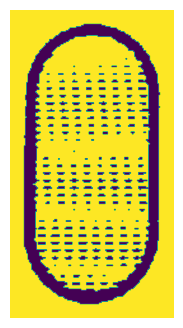

big count is:  3


In [262]:
# Now we will once again find contours. This time we will use them 
# to determine the fill of the shape.
cnts, hierarchy = cv2.findContours(thresh_single_shape, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print("num contours: ", len(cnts))

bigCount= 0
smallCount = 0
for i, contour in enumerate(cnts):
    area = cv2.contourArea(contour)

    if area < 10:
        continue

    if area > 10000:
        bigCount +=1
    else:
        smallCount +=1



    cv2.drawContours(thresh_single_shape, contour, -1, 255, thickness=cv2.FILLED)

display_image(thresh_single_shape)
print("big count is: ", bigCount)

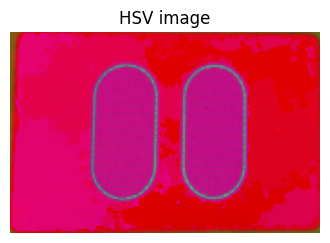

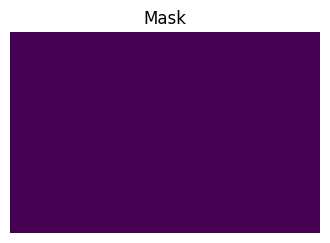

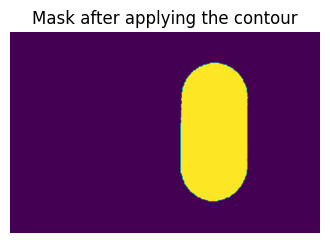

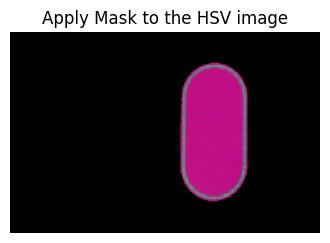

In [202]:
# Convert the image to HSV
card_image_hsv = cv2.cvtColor(card, cv2.COLOR_BGR2HSV)

display_image(card_image_hsv, title="HSV image")

# Create a mask for the contour area
mask = np.zeros(card_image_hsv.shape[:2], dtype=np.uint8)
display_image(mask, "Mask")

cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)

display_image(mask, title="Mask after applying the contour")

# Mask the HSV image
masked_hsv = cv2.bitwise_and(card_image_hsv, card_image_hsv, mask=mask)

display_image(masked_hsv, title="Apply Mask to the HSV image")

# Calculate the histogram for the Hue channel
hist_hue = cv2.calcHist([masked_hsv], [0], mask, [180], [0, 180])

In [193]:
# Exclude the white background (assuming white is around HSV value 0)
# Define color ranges
red_range1 = [(0, 10)]
red_range2 = [(170, 180)]
green_range = [(40, 80)]
purple_range = [(130, 160)]

def is_in_range(value, ranges):
    for lower, upper in ranges:
        if lower <= value < upper:
            return True
    return False

# Find the most frequent hue value in the masked area
most_frequent_hue = np.argmax(hist_hue)

# Determine the dominant color
if is_in_range(most_frequent_hue, red_range1) or is_in_range(most_frequent_hue, red_range2):
    dominant_color = 'red'
elif is_in_range(most_frequent_hue, green_range):
    dominant_color = 'green'
elif is_in_range(most_frequent_hue, purple_range):
    dominant_color = 'purple'
else:
    dominant_color = 'unknown'

print(f"Dominant color: {dominant_color}")

Dominant color: purple


## Colour

In [125]:
# Create a mask for the contour area
mask = np.zeros(card.shape[:2], dtype=np.uint8)
cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)